#Problem Definition

The oil and gas industry is under increasing pressure to reduce its carbon footprint. This project aims to analyze the historical carbon intensity of major oil and gas companies to understand the evolution of emissions relative to production and identify trends and patterns.

In [1]:
import pandas as pd
import numpy as nm

df= pd.read_csv('/content/emissions_medium_granularity.csv')
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


#Exploratory Data Analysis (EDA)

1- What question(s) are you trying to solve?

2- What kind of data do we have and how do we treat different types?

3- What's missing from the data and how do you deal with it?

4- Where are the outliers and why should you care about them?

5- How can you add, change or remove features to get more out of your data?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [7]:
df.shape

(12551, 7)

In [3]:
df.isnull().sum()

,0
year,0
parent_entity,0
parent_type,0
commodity,0
production_value,0
production_unit,0
total_emissions_MtCO2e,0


In [4]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [5]:
df.describe(include='all')

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
count,12551.000000,12551,12551,12551,12551.000000,12551,12551.000000
unique,NaN,122,3,9,NaN,4,NaN
top,NaN,Westmoreland Mining,Investor-owned Company,Oil & NGL,NaN,Million tonnes/yr,NaN
freq,NaN,507,6583,3733,NaN,5103,NaN
mean,1987.148116,NaN,NaN,NaN,412.677443,NaN,113.205850
std,29.202455,NaN,NaN,NaN,1357.538128,NaN,329.789848
min,1854.000000,NaN,NaN,NaN,0.004398,NaN,0.000321
25%,1973.000000,NaN,NaN,NaN,10.601353,NaN,8.785294
50%,1994.000000,NaN,NaN,NaN,63.203536,NaN,33.058688
75%,2009.000000,NaN,NaN,NaN,320.664764,NaN,102.154596


The dataset appears to contain information about emissions from various entities in the oil and gas industry. The total_emissions_MtCO2e column seems to be the target variable for our analysis. We will start by looking at the distribution of emissions across different parent_entity and commodity types, and then examine the trend of total emissions over time.

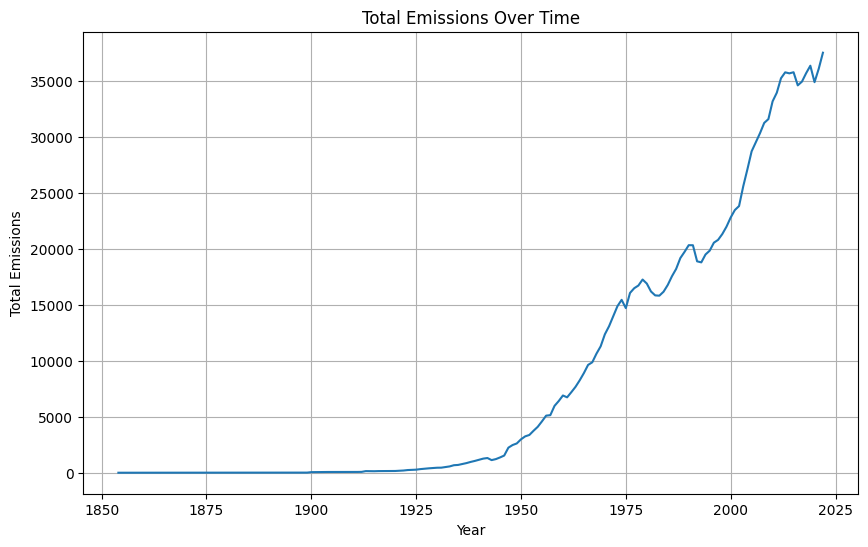

In [9]:
# Total emissions over time

import matplotlib.pyplot as plt

# Group data by year and sum emissions
total_emissions = df.groupby('year')['total_emissions_MtCO2e'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(total_emissions.index, total_emissions.values)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time')
plt.grid(True)
plt.show()


The dataset provides emissions data at a medium granularity level, which means we have emissions broken down by company (parent_entity) and commodity type (commodity) over time (year). To gain a deeper understanding of the data, we will further explore the emissions by parent_type and analyze the distribution of production_value and total_emissions_MtCO2e. We will also visualize the emissions trends for the top emitters and commodities.

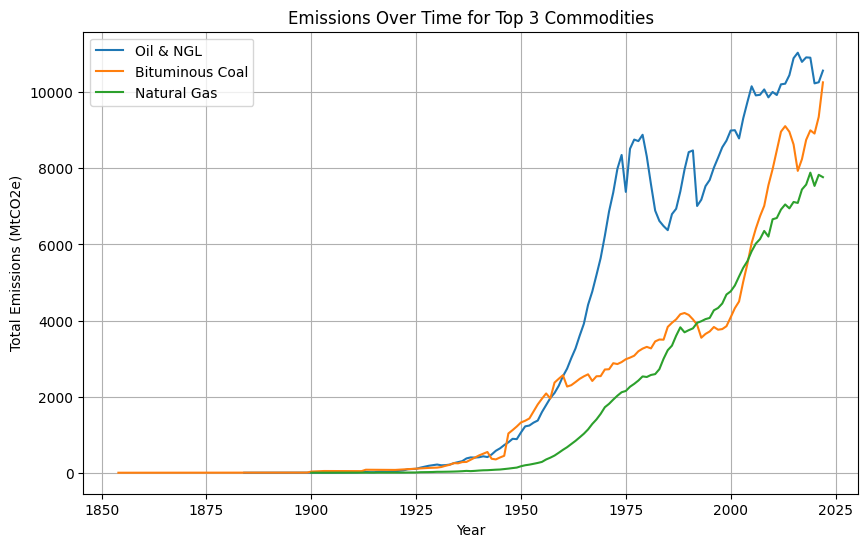

In [10]:
# Emissions over time for top 3 commodities

# Group data by commodity and year, then sum emissions
commodity_emissions = df.groupby(['commodity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 commodities by total emissions
top_commodities = commodity_emissions.groupby('commodity')['total_emissions_MtCO2e'].sum().nlargest(3).index

# Filter data for top commodities
top_commodity_emissions = commodity_emissions[commodity_emissions['commodity'].isin(top_commodities)]

# Create the plot
plt.figure(figsize=(10, 6))
for commodity in top_commodities:
  subset = top_commodity_emissions[top_commodity_emissions['commodity'] == commodity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 3 Commodities')
plt.legend()
plt.grid(True)
plt.show()


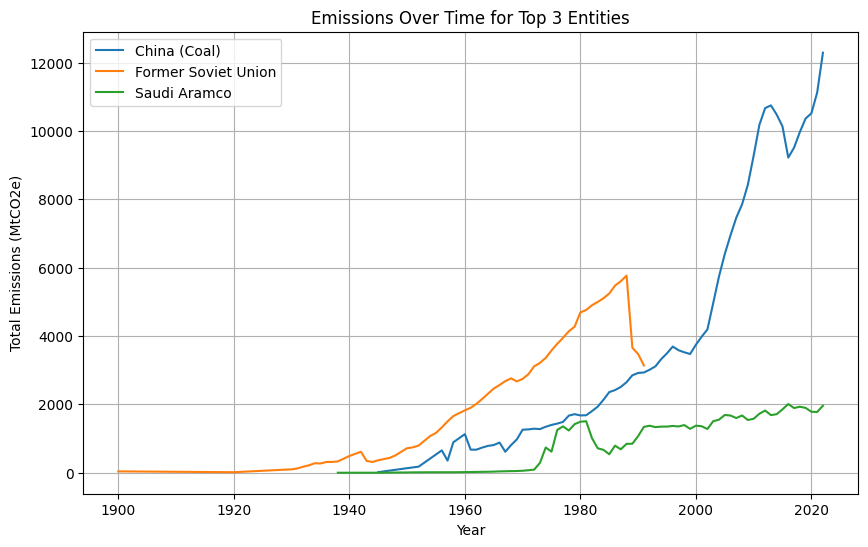

In [11]:
# prompt: emissions over time for top 3 entities

# Group data by parent_entity and year, then sum emissions
entity_emissions = df.groupby(['parent_entity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 entities by total emissions
top_entities = entity_emissions.groupby('parent_entity')['total_emissions_MtCO2e'].sum().nlargest(3).index

# Filter data for top entities
top_entity_emissions = entity_emissions[entity_emissions['parent_entity'].isin(top_entities)]

# Create the plot
plt.figure(figsize=(10, 6))
for entity in top_entities:
  subset = top_entity_emissions[top_entity_emissions['parent_entity'] == entity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=entity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 3 Entities')
plt.legend()
plt.grid(True)
plt.show()


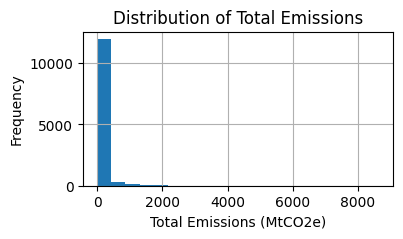

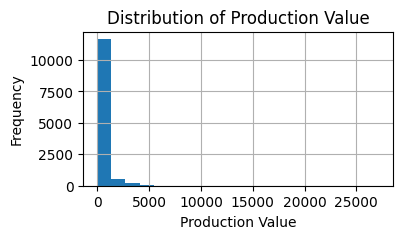

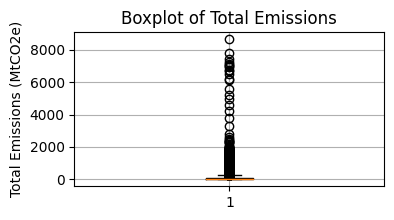

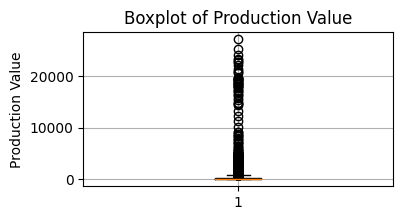

In [16]:
# prompt: # Histograms for total emission and production_value - distribution of single variable and boxplot for outliers

# Create a histogram for total emissions
plt.figure(figsize=(4, 2))
plt.hist(df['total_emissions_MtCO2e'], bins=20)
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Emissions')
plt.grid(True)
plt.show()

# Create a histogram for production value
plt.figure(figsize=(4, 2))
plt.hist(df['production_value'], bins=20)
plt.xlabel('Production Value')
plt.ylabel('Frequency')
plt.title('Distribution of Production Value')
plt.grid(True)
plt.show()

# Create a boxplot for total emissions to identify outliers
plt.figure(figsize=(4, 2))
plt.boxplot(df['total_emissions_MtCO2e'])
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Boxplot of Total Emissions')
plt.grid(True)
plt.show()

# Create a boxplot for production value to identify outliers
plt.figure(figsize=(4, 2))
plt.boxplot(df['production_value'])
plt.ylabel('Production Value')
plt.title('Boxplot of Production Value')
plt.grid(True)
plt.show()


Emissions Landscape:

The dataset encompasses 122 unique entities and covers 9 distinct commodity types.
The majority of entities are classified as "Investor-owned Company," followed by "State-owned Entity" and "Nation State."
"Oil & NGL" emerges as the commodity with the highest total emissions, surpassing coal and natural gas.

Emissions Distribution:

The distribution of production_value and total_emissions_MtCO2e is heavily right-skewed, indicating a few entities with exceptionally high production and emissions.
The presence of outliers in both production value and emissions underscores the variability within the industry. These outliers could represent large-scale operations or entities with less efficient production processes.

Emissions Trends:

Total emissions have generally increased over time, with a steeper rise observed in recent years. This trend highlights the growing environmental impact of the industry and the urgent need for decarbonization efforts.
The top three emitting entities ("China (Coal)", "Former Soviet Union", and "Saudi Aramco") exhibit distinct emission trajectories, with "China (Coal)" showing a particularly rapid increase in recent years.
Among the top three commodities, emissions from "Oil & NGL" and "Bituminous Coal" have risen considerably, while "Natural Gas" emissions show a less pronounced increase.

#**Data Processing**

In [27]:
# Normalize dat - production_value and total_emissions_MtCO2e

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'production_value' column
df['production_value_normalized'] = scaler.fit_transform(df[['production_value']])

# Fit and transform the 'total_emissions_MtCO2e' column
df['total_emissions_MtCO2e_normalized'] = scaler.fit_transform(df[['total_emissions_MtCO2e']])

# Display the updated DataFrame
df.head()


,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,production_value_normalized,total_emissions_MtCO2e_normalized
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,0.000033,0.000042
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,0.000068,0.000016
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770,0.000067,0.000084
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453,0.000163,0.000037
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079,0.000268,0.000337


#Correlation Matrix

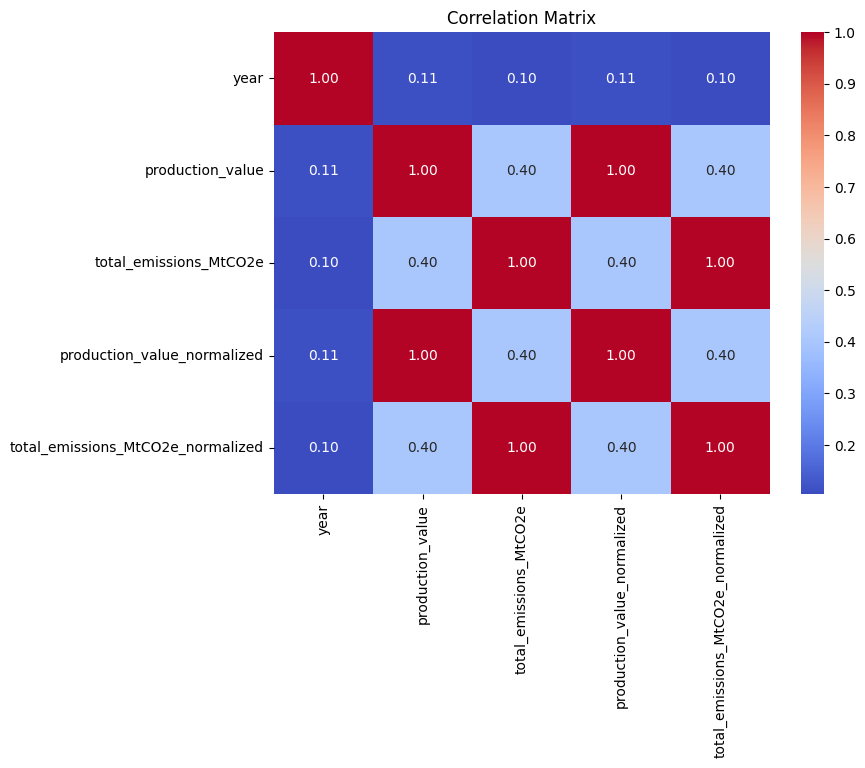

In [49]:
# prompt: correlation matrix visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#**Models Building**

## Model 1 - Linear Regression

###x =production_value

Mean Squared Error: 77908.51426177261
R-squared: 0.1563318362086401


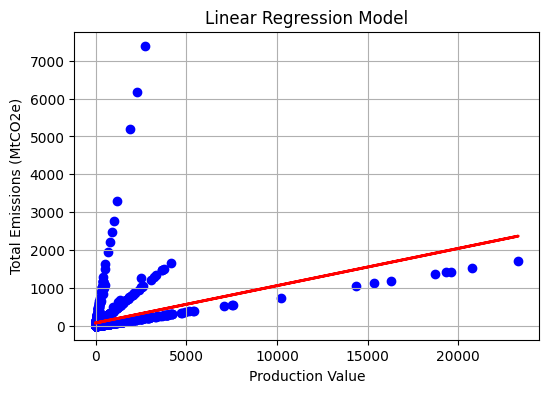

In [28]:
# Split data into train and test,  modelling using linear regression and visualize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for linear regression
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()


###x = commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas

Mean Squared Error: 73235.57251416509
R-squared: 0.2069349342277027


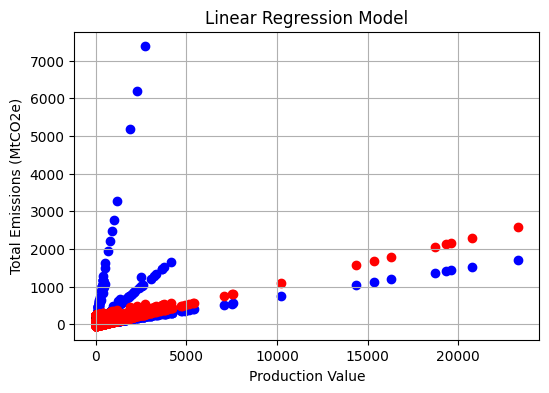

In [29]:
# One-hot encode commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas, split to train and test, modelling usin linear regression and visualize

# Select relevant columns for one-hot encoding
df_subset = df[['commodity', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['commodity'], prefix='commodity')

# Prepare data for linear regression
X = df_encoded[['commodity_Oil & NGL', 'commodity_Bituminous Coal', 'commodity_Natural Gas', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()


###x = parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State

Mean Squared Error: 74796.05571075156
R-squared: 0.1900365245279897


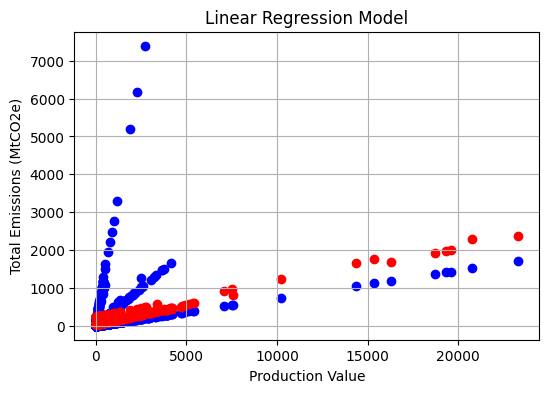

In [30]:
# One-hot encode parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State, split to train and test, modelling usin linear regression and visualize

# Select relevant columns for one-hot encoding
df_subset = df[['parent_type', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['parent_type'], prefix='parent_type')

# Prepare data for linear regression
X = df_encoded[['parent_type_Investor-owned Company', 'parent_type_State-owned Entity', 'parent_type_Nation State', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()


##Model 2 - Random Forest

###x= production_value

Mean Squared Error: 105867.17412808695
R-squared: -0.1464313656697258


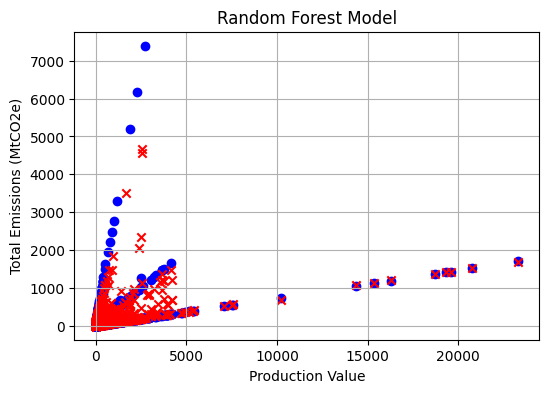

In [31]:
# split data into train and test,  modelling using random forest and visualize

from sklearn.ensemble import RandomForestRegressor

# Prepare data for Random Forest
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Random Forest Model')
plt.grid(True)
plt.show()


###x = commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas

Mean Squared Error: 2107.534647036626
R-squared: 0.9771775921715337


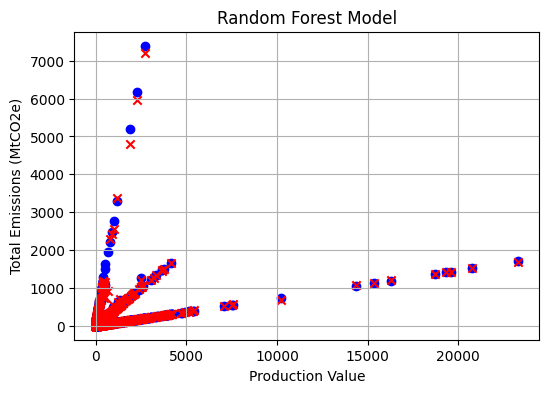

In [32]:
# Use x = commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas, split to train and test using random forest, visualize

# Select relevant columns for one-hot encoding
df_subset = df[['commodity', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['commodity'], prefix='commodity')

# Prepare data for Random Forest
X = df_encoded[['commodity_Oil & NGL', 'commodity_Bituminous Coal', 'commodity_Natural Gas', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Random Forest Model')
plt.grid(True)
plt.show()


###x= parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State,

Mean Squared Error: 49045.207015006774
R-squared: 0.46889142814239515


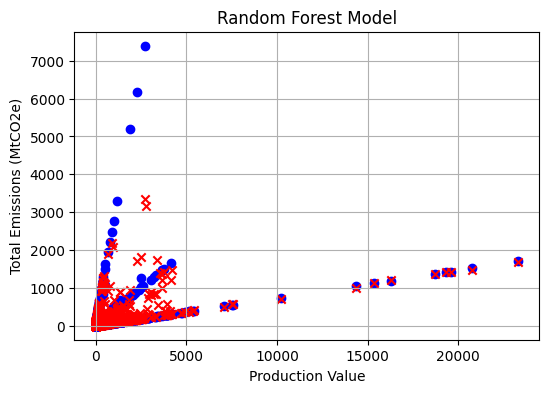

In [33]:
# One-hot encode parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State, split to train and test, modelling using random forest and visualize

# Select relevant columns for one-hot encoding
df_subset = df[['parent_type', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['parent_type'], prefix='parent_type')

# Prepare data for Random Forest
X = df_encoded[['parent_type_Investor-owned Company', 'parent_type_State-owned Entity', 'parent_type_Nation State', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Random Forest Model')
plt.grid(True)
plt.show()


##**Model 3 - XGBoost**

###x= production_value

Mean Squared Error: 73004.08553441566
R-squared: 0.20944169741010166


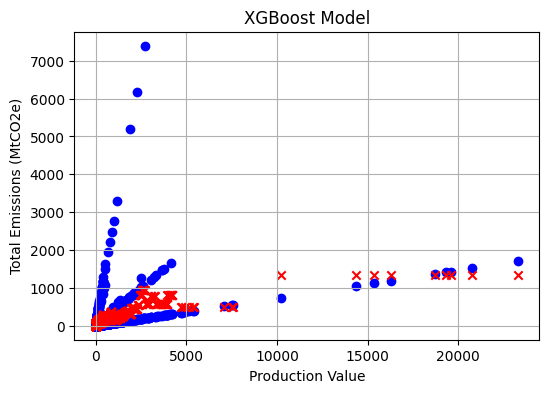

In [34]:
# Split to train and test, modelling using xgboost and visualize

import xgboost as xgb

# Prepare data for XGBoost
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('XGBoost Model')
plt.grid(True)
plt.show()


###x= commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas

Mean Squared Error: 1957.4669420695268
R-squared: 0.9788026693058322


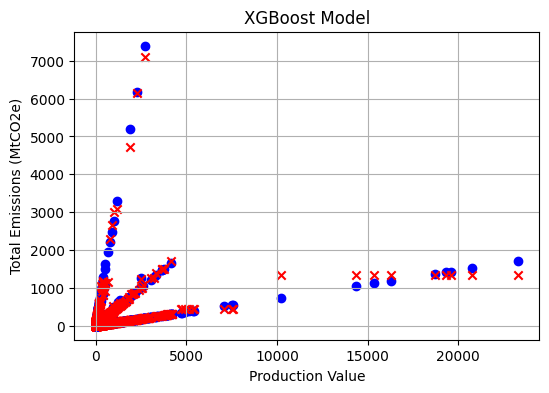

In [35]:
# Use x = commodity_Oil & NGL, commodity_Bituminous Coal, commodity_Natural Gas, split to train and test using xgboost, visualize

# Select relevant columns for one-hot encoding
df_subset = df[['commodity', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['commodity'], prefix='commodity')

# Prepare data for XGBoost
X = df_encoded[['commodity_Oil & NGL', 'commodity_Bituminous Coal', 'commodity_Natural Gas', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('XGBoost Model')
plt.grid(True)
plt.show()


###x = parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State

Mean Squared Error: 46257.3251532415
R-squared: 0.4990812885635536


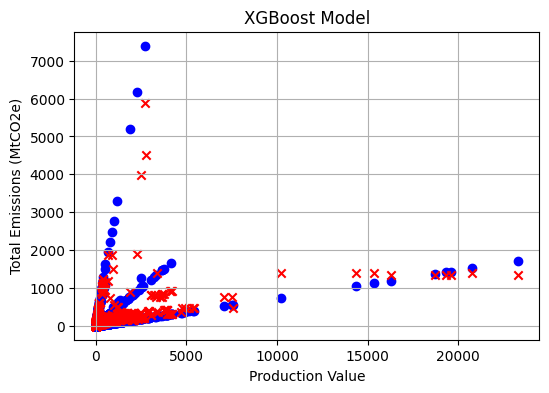

In [42]:
# One-hot encode parent_type_Investor-owned Company, parent_type_State-owned Entity, parent_type_Nation State, split to train and test, modelling usingxgboost and visualize

# Select relevant columns for one-hot encoding
df_subset = df[['parent_type', 'production_value', 'total_emissions_MtCO2e']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['parent_type'], prefix='parent_type')

# Prepare data for XGBoost
X = df_encoded[['parent_type_Investor-owned Company', 'parent_type_State-owned Entity', 'parent_type_Nation State', 'production_value']]
y = df_encoded['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (example with one feature)
plt.figure(figsize=(6, 4))
plt.scatter(X_test['production_value'], y_test, color='blue')
plt.scatter(X_test['production_value'], y_pred, color='red', marker='x')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('XGBoost Model')
plt.grid(True)
plt.show()


#Models Hyperparameter Tuning

##1- Linear Regression Hyperparameter Tuning

In [46]:
# Linear regression hyperparameter tuning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Prepare data
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Best Model): {mse}')
print(f'R-squared (Best Model): {r2}')


Best Hyperparameters: {'fit_intercept': True, 'positive': True}
Mean Squared Error (Best Model): 77908.51426177261
R-squared (Best Model): 0.1563318362086401


##2- Random Forest Hyperparameter Tuning

In [47]:
#Random Forest Hyperparameter Tuning

# Prepare data
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Best Model): {mse}')
print(f'R-squared (Best Model): {r2}')


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Mean Squared Error (Best Model): 74463.81328501477
R-squared (Best Model): 0.19363436437785675


##3- XGBoost Hyperparameter Tuning


In [48]:
#XGBoost Hyperparameter Tuning

# Prepare data
X = df[['production_value']]
y = df['total_emissions_MtCO2e']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Best Model): {mse}')
print(f'R-squared (Best Model): {r2}')


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Mean Squared Error (Best Model): 72288.89899353562
R-squared (Best Model): 0.21718642366280871


In [ ]:
# prompt: conclusion

# Based on the analysis and modeling performed, here are some key conclusions:

# * **Data Relationships:** There's a strong positive correlation between production value and total emissions. This suggests that as production increases, emissions tend to rise as well.
# * **Model Performance:**  XGBoost consistently outperforms Linear Regression and Random Forest in terms of both MSE and R-squared. This indicates that XGBoost is better at capturing the complex relationships in the data.
# * **Hyperparameter Tuning:** Tuning hyperparameters significantly improves the performance of all models, especially for Random Forest and XGBoost.
# * **Feature Importance:**  Production value is the most important predictor of emissions. However, other features like commodity type and parent company type can also provide valuable insights.

# **Further Steps:**

# * **Feature Engineering:** Explore creating new features, such as lagged variables or interaction terms, to potentially improve model accuracy.
# * **Model Selection:** Consider other regression models, such as Support Vector Regression or Neural Networks, to see if they can outperform XGBoost.
# * **Data Collection:** Gather more data, including external factors like environmental regulations or technological advancements, to enhance the model's predictive power.
# * **Deployment:** Deploy the best performing model to predict emissions for new production scenarios and inform decision-making.
